In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [7]:
def rk4_vector(f,t0,x0,h):
    k1 = h*f(t0, x0)

    k2 = h*f(t0+h/2, x0+k1/2)
             
    k3 = h*f(t0+h/2, x0+k2/2)
 
    k4 = h*f(t0+h, x0+k3)

    x1 = x0 + (k1+2*k2+2*k3+k4)/6
    
    return x1

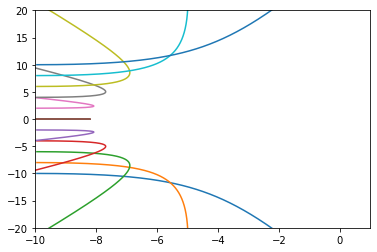

In [8]:
# Nuclear radius equal to Rt
h = 1
t_min = 0
t_max = 10000
b_min = -10
b_max = 10
x_min = -10
E = 5
m = 3727.379378
A = 197
Rt = 1.2*(A**(1/3))
q = 2
Q = 79
e2 = 1.44

b_list = range(b_min,b_max+1,2)
t_list = range(t_min,t_max+1,h)
ax = plt.gca()
ax.set_xlim([-10, 1])
ax.set_ylim([-20, 20])

def f(t,x):
    z1 = x[0][0]
    z2 = x[1][0]
    z3 = x[2][0]
    z4 = x[3][0]
    
    r = (z1**2+z3**2)**0.5
    r = max(r,Rt)
    
    a = z2
    b = q*Q*e2*z1/(m*(r**3))
    c = z4
    d = q*Q*e2*z3/(m*(r**3))
    
    return np.array([[a],[b],[c],[d]])

for b in b_list:
    x_list = []
    y_list = []
    x1 = np.array([[x_min],[(2*E/m)**0.5],[b],[0]])

    for t in t_list:
        x0 = x1
        x1 = rk4_vector(f,t,x0,h)
        x_list.append(x1[0][0])
        y_list.append(x1[2][0])

    plt.plot(x_list,y_list)
plt.show()

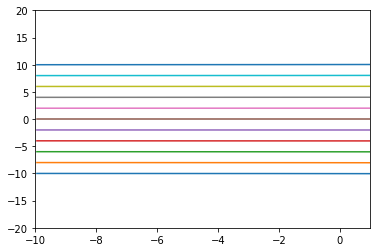

In [9]:
# Nuclear radius order of magnitude bigger
h = 1
t_min = 0
t_max = 10000
b_min = -10
b_max = 10
x_min = -10
E = 5
m = 3727.379378
A = 197
Rt = 1.2*(A**(1/3))*10  # Previous radius*10
q = 2
Q = 79
e2 = 1.44

b_list = range(b_min,b_max+1,2)
t_list = range(t_min,t_max+1,h)
ax = plt.gca()
ax.set_xlim([-10, 1])
ax.set_ylim([-20, 20])

def f(t,x):
    z1 = x[0][0]
    z2 = x[1][0]
    z3 = x[2][0]
    z4 = x[3][0]
    
    r = (z1**2+z3**2)**0.5
    r = max(r,Rt)
    
    a = z2
    b = q*Q*e2*z1/(m*(r**3))
    c = z4
    d = q*Q*e2*z3/(m*(r**3))
    
    return np.array([[a],[b],[c],[d]])

for b in b_list:
    x_list = []
    y_list = []
    x1 = np.array([[x_min],[(2*E/m)**0.5],[b],[0]])

    for t in t_list:
        x0 = x1
        x1 = rk4_vector(f,t,x0,h)
        x_list.append(x1[0][0])
        y_list.append(x1[2][0])

    plt.plot(x_list,y_list)
plt.show()
# At a higher nuclear radius, there is no scattering

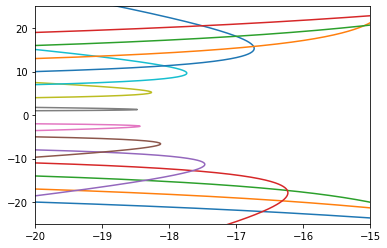

In [10]:
# cylindrical coordinates
h = 0.001
b_min = -20
b_max = 20
x0 = 20
E = 5
m = 3727.379378
v = (2*E/m)**0.5

A = 197
q = 2
Q = 79
e2 = 1.44

b_list = range(b_min,b_max+1,3)
ax = plt.gca()
ax.set_xlim([-20, -15])
ax.set_ylim([-25, 25])

for b in b_list:
    x_list = []
    y_list = []
    if b<0:
        factor = -1
    else:
        factor = 1
    k = q*Q*e2/(m*(v**2)*(b**2))
    ui = 1/((x0**2+b**2)**(0.5))
    thetai = math.pi - math.atan(b/x0)
    theta0 = math.atan(-(1+math.cos(thetai)+ui/k)/math.sin(thetai))
    u0 = -k/math.cos(theta0)
    theta = thetai
    u = ui
    while (u>0.001):
        r = 1/u
        x_list.append(r*math.cos(theta))
        y_list.append(r*math.sin(theta))
        theta = theta - factor*h
        u = u0*math.cos(theta-theta0)-k
    plt.plot(x_list,y_list)
plt.show()